In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
iters = pd.read_csv('train/train.csv',iterator=True)
chunk = iters.get_chunk(10000)
chunk.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [2]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null int64
C1                  10000 non-null int64
banner_pos          10000 non-null int64
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null int64
device_conn_type    10000 non-null int64
C14                 10000 non-null int64
C15                 10000 non-null int64
C16                 10000 non-null int64
C17                 10000 non-null int64
C18                 10000 non-null int64
C19                 1

In [39]:
chunk.iloc[:50,5:16]

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type
0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2
1,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0
2,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0
3,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0
4,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0
5,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0
6,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b264c159,be6db1d7,1,0
7,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e6f67278,be74e6fe,1,0
8,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,37e8da74,5db079b5,1,2
9,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0


In [4]:
#查看自变量取值为object的分布和变化
#其中appid和appdomain和appcategory还有deviceid单个数目达8000/10000
#考虑优先处理这几个特征取值较为单一的特征
chunk.describe(include=['O'])

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,381,317,14,313,31,14,1075,7302,1168
top,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,3582,3582,3846,7825,8306,7887,8724,86,718


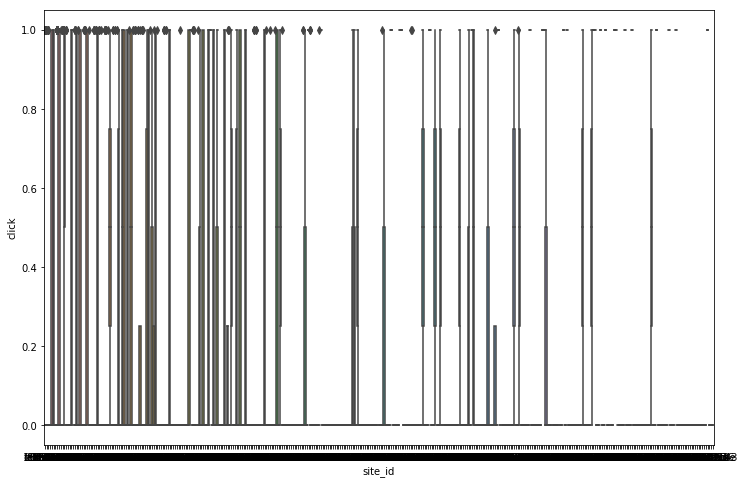

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(x='site_id',y='click',data=chunk)

In [6]:
chunk.C1.unique()

array([1005, 1002, 1010, 1001, 1007, 1008], dtype=int64)

In [7]:
chunk.C14.unique()

array([15706, 15704, 18993, 16920, 20362, 20632, 15707, 21689, 17747,
       15701, 20596, 19771, 20984, 15699, 17914, 15708,  6558, 21234,
       20352, 20366, 21665, 21611, 16838, 18987, 19870, 21661, 16208,
       17037, 15705, 16615, 20634, 17212, 15702, 17654,  4687, 15703,
       21691, 20633, 21682, 19772, 18945, 19665, 19743, 16859, 21300,
       17661,  9438, 17264, 20359, 17875, 19016,  6616, 20170, 17614,
       21612, 17753, 21660,  6563, 19950, 17239, 17081, 20346, 21310,
       20382, 16989, 17163, 21688, 20153, 18648,  9461, 15006, 20980,
       16071, 21309, 20751,   381, 19015, 20508, 17653,   377, 19666,
         456, 20345,  6559, 20251, 21189, 21692, 18311, 19865, 20093,
       12000, 15700, 13780,  6557, 18095, 21311, 20363, 16858, 18936,
        1270, 15698, 20143, 20312, 20969,  6393, 20355,  6560, 12004,
        9478, 21674, 17877, 20009, 19733, 21683, 21684, 12470,  6392,
       19741, 15908, 20077, 18091, 20007, 18856, 17586, 20365,   380,
       20390, 20966,

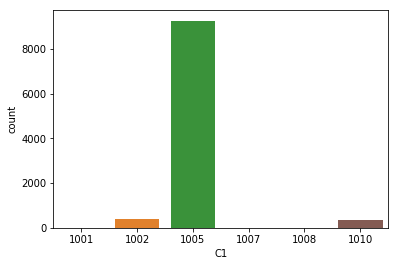

In [8]:
#1005取值占非常多，考虑将其他取值定为other
sns.countplot(chunk.C1)

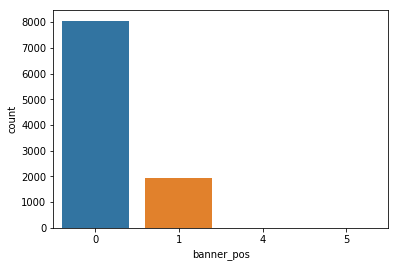

In [9]:
#banner只有0 1取值
sns.countplot(chunk.banner_pos)

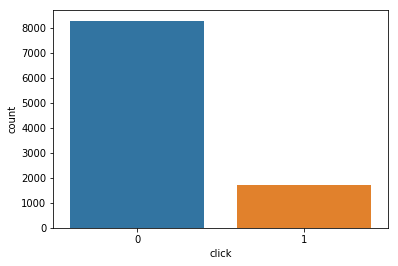

In [10]:
#正负比例大于在2：:8的程度
sns.countplot(chunk.click)

# 特征之间的联合分布关系

In [16]:
#相似矩阵，没看出什么。。。
chunk_drop = chunk.drop('id',axis=1)
chunk_drop.corr()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
click,1.000000,NaN,-0.051617,0.025473,-0.054034,-0.030382,-0.087630,-0.061522,0.139553,-0.081150,0.035721,0.065797,-0.015000,-0.151854
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,-0.051617,NaN,1.000000,0.367787,0.966383,0.116743,0.127260,0.052628,-0.009144,0.134909,0.095982,-0.057215,-0.078781,0.112773
banner_pos,0.025473,NaN,0.367787,1.000000,0.381344,0.050581,0.139898,-0.058082,-0.095423,0.131165,0.171325,0.309933,0.009787,-0.026711
device_type,-0.054034,NaN,0.966383,0.381344,1.000000,0.106015,0.163287,0.056523,-0.020130,0.175760,0.163658,-0.054398,-0.063507,0.112441
device_conn_type,-0.030382,NaN,0.116743,0.050581,0.106015,1.000000,0.002294,0.051213,-0.014208,-0.007743,0.009501,-0.025278,0.011127,0.077320
C14,-0.087630,NaN,0.127260,0.139898,0.163287,0.002294,1.000000,-0.071252,0.054249,0.976833,0.139157,0.110566,-0.018561,0.390622
C15,-0.061522,NaN,0.052628,-0.058082,0.056523,0.051213,-0.071252,1.000000,-0.264611,-0.084087,-0.022744,0.057104,0.022833,-0.023300
C16,0.139553,NaN,-0.009144,-0.095423,-0.020130,-0.014208,0.054249,-0.264611,1.000000,0.071555,0.192700,-0.044714,-0.004884,-0.229625
C17,-0.081150,NaN,0.134909,0.131165,0.175760,-0.007743,0.976833,-0.084087,0.071555,1.000000,0.166738,0.078131,-0.036728,0.367974


In [17]:
#协方差矩阵,没看出什么。。。
chunk_drop.cov()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
click,0.141510,0.0,-0.021421,0.003880,-0.012236,-0.007388,-1.034856e+02,-0.265973,1.964717,-1.175774e+01,0.016513,5.792798e+00,-2.737635e+02,-2.579365
hour,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
C1,-0.021421,0.0,1.217034,0.164282,0.641779,0.083259,4.407334e+02,0.667235,-0.377523,5.732344e+01,0.130122,-1.477236e+01,-4.216575e+03,5.617570
banner_pos,0.003880,0.0,0.164282,0.163940,0.092949,0.013240,1.778215e+02,-0.270267,-1.445980,2.045505e+01,0.085245,2.936961e+01,1.922603e+02,-0.488342
device_type,-0.012236,0.0,0.641779,0.092949,0.362385,0.041257,3.085813e+02,0.391040,-0.453518,4.075185e+01,0.121068,-7.664014e+00,-1.854788e+03,3.056353
device_conn_type,-0.007388,0.0,0.083259,0.013240,0.041257,0.417922,4.655483e+00,0.380487,-0.343753,-1.927899e+00,0.007548,-3.824463e+00,3.489830e+02,2.256994
C14,-103.485611,0.0,440.733415,177.821467,308.581341,4.655483,9.855182e+06,-2570.648701,6373.671403,1.181120e+06,536.840029,8.123495e+04,-2.827027e+06,55370.839688
C15,-0.265973,0.0,0.667235,-0.270267,0.391040,0.380487,-2.570649e+03,132.075924,-113.811680,-3.722030e+02,-0.321213,1.535923e+02,1.273075e+04,-12.091033
C16,1.964717,0.0,-0.377523,-1.445980,-0.453518,-0.343753,6.373671e+03,-113.811680,1400.668682,1.031445e+03,8.862523,-3.916495e+02,-8.868025e+03,-388.041764
C17,-11.757742,0.0,57.323439,20.455050,40.751853,-1.927899,1.181120e+06,-372.203041,1031.445285,1.483485e+05,78.919634,7.042946e+03,-6.863238e+05,6399.566041


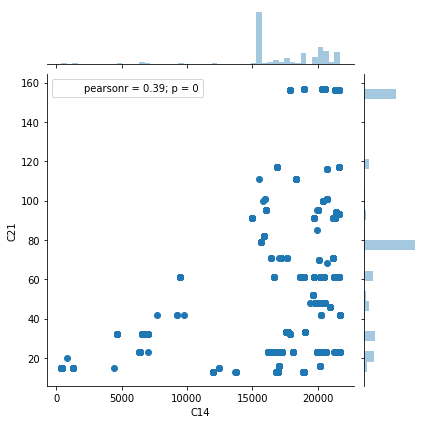

In [18]:
sns.jointplot(x='C14',y='C21',data=chunk_drop)#同样看不出什么。。。

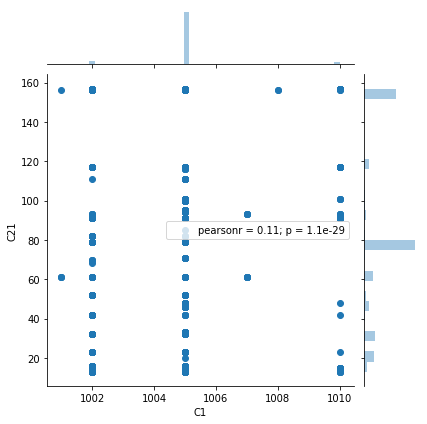

In [19]:
sns.jointplot(x='C1',y='C21',data=chunk_drop)#还是看不出什么。。。

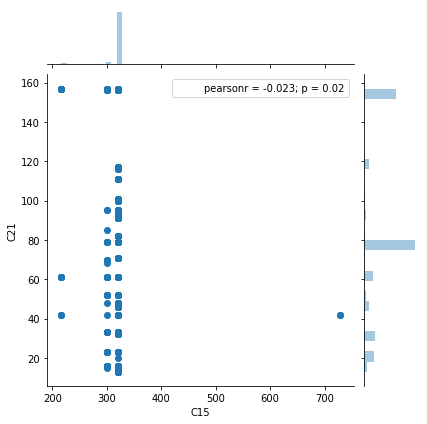

In [20]:
sns.jointplot(x='C15',y='C21',data=chunk_drop)#看不出什么。。。

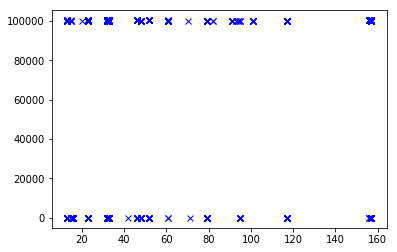

In [24]:
#分析C21与C20的分布
#plt.plot(chunk_drop[chunk_drop['click']==0]['C21'],chunk_drop[chunk_drop['click']==0]['C20'],'r*',label='0')
plt.plot(chunk_drop[chunk_drop['click']==1]['C21'],chunk_drop[chunk_drop['click']==1]['C20'],'bx',label='0')

In [27]:
chunk_drop[chunk_drop['click']==1]['C20']

8           -1
23          -1
27      100111
32      100083
37      100034
39          -1
44      100228
46          -1
50          -1
52      100131
53      100084
60      100034
65      100084
68          -1
77          -1
86          -1
87      100191
92      100148
96      100084
97          -1
103     100200
111         -1
114         -1
124     100228
132     100084
136         -1
146         -1
152     100084
163         -1
166     100131
         ...  
9831        -1
9833        -1
9840        -1
9845        -1
9852        -1
9860        -1
9866        -1
9883        -1
9888        -1
9891        -1
9898        -1
9901    100177
9903        -1
9912        -1
9921        -1
9929    100077
9930    100084
9933        -1
9943        -1
9945        -1
9946        -1
9959    100084
9963        -1
9967        -1
9970    100075
9973    100084
9980    100084
9990        -1
9996        -1
9997        -1
Name: C20, Length: 1706, dtype: int64

In [28]:
len(chunk.id.unique())

10000

In [32]:
iters2 = pd.read_csv('train/train.csv',iterator=True)
chunk2 = iters2.get_chunk(500000)
chunk2.head()
#读入数目太多导致id类无法显示

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [33]:
chunk2.describe(include='O')

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,500000,500000,500000,500000,500000,500000,500000,500000,500000
unique,1704,1586,21,1641,122,20,41413,171304,3967
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,153042,158738,166816,346958,366566,349947,420728,3339,32805


In [36]:
chunk2['site_category'].value_counts()

50e219e0    166816
28905ebd    151280
f028772b    118430
3e814130     43640
76b2941d      5974
335d28a8      4653
f66779e6      3030
0569f928      2511
72722551      1455
75fa27f6      1404
70fb0e29       373
c0dd3be3       259
a818d37a        88
dedf689d        24
e787de0e        18
bcf865d9        17
8fd0aea4        10
42a36e14         8
5378d028         6
9ccfa2ea         3
110ab22d         1
Name: site_category, dtype: int64

In [40]:
len(chunk2.device_ip.unique())
#device_ip

171304

In [43]:
len(chunk2.device_model.unique())
#device_model

3967

In [48]:
#C类别的频数
for i in range(14,22):
    print ('C{0} is {1}'.format(i,len(chunk2['C'+str(i)].unique())))

C14 is 540
C15 is 8
C16 is 9
C17 is 154
C18 is 4
C19 is 40
C20 is 154
C21 is 34


# 看一下10天数据里按时间点击率分布情况

用滑动平均模型看看10天内点击率变化
这里具体实现采用不停读取1W数据然后计算点击率
decay为0.999

In [65]:
chunk_drop[chunk_drop['click']==0]['click'].count()

8294

In [86]:
ites_hour = pd.read_csv('train/train.csv',iterator=True)

In [78]:
decay = 0.999

In [88]:
hour_n = np.array([0],dtype=np.float16)

In [89]:
for i in xrange(4000):
    chunk_hour =ites_hour.get_chunk(10000)
    #num_0 = chunk_hour[chunk_hour['click']==0]['click'].count()
    num_1 = chunk_hour[chunk_hour['click']==1]['click'].count()
    hour_n = np.append(hour_n,num_1/10000.0)

In [90]:
hour_n

array([0.    , 0.1706, 0.173 , ..., 0.1969, 0.1944, 0.1918])

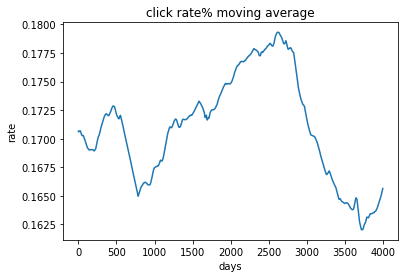

In [91]:
#去除第一个数0
hour_n = hour_n[1:]
plt.title('click rate% moving average')
moving_hour_n = np.array([hour_n[0]],dtype=np.float16)
shadow_variable  =hour_n[0]
for i in xrange(1,4000):
    shadow_variable = shadow_variable*decay + hour_n[i]*(1-decay)
    moving_hour_n = np.append(moving_hour_n,shadow_variable)
plt.plot(range(4000),moving_hour_n)
plt.xlabel("days")
plt.ylabel("rate")
plt.show()

分析：当然这里只是取了40M数据中很小的一部分来进行数据探索，但可以发现该数据经过了降采样负样本和正样本比例相适。
匿名类别暂时没有好的想法去处理。
这里所有非明文的数据都要进行hash trick,并且针对实际考虑，要对一些低频率特征others化

site三兄弟除category以外，类别值都1500+,三者最高频率类似
app三兄弟和site差不多
观察了前50个数据，device_ip & model条条不同，根据推荐算法中的用户-广告-上下文，推断device特征在一定程度上刻画了user
这个数据集的hour在我看来也比较重要
另外可能还要生成额外数值型特征，以增强特征表达能力（数值型特征可以交给gbdt来离散化）最后一起onehot然后交给FFM+LR

关于模型融合，在后面在进行考虑